# Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

* Source: [Reproducible Data Analysis in Jupyter](http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/)
* Credit: Jake VanderPlas, University of Washington eScience Institute

In [1]:
# Import the required libraries and set default settings

from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# Prepare the Fremont data url

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [3]:
# Define helper functions

# Download the Fremont data if it doesn't exist already
def get_fremont_data(file_name='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(file_name):
        urlretrieve(URL, file_name)
        
    fremont_df = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    fremont_df.columns = ['Total', 'East', 'West']
    
    return fremont_df

In [4]:
# Get the Fremont data and store it into a dataframe

fremont_df = get_fremont_data()

In [5]:
# Check the initial format of the data

fremont_df.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [6]:
# Check the shape of the data

fremont_df.shape

(138542, 3)

<AxesSubplot:xlabel='Date'>

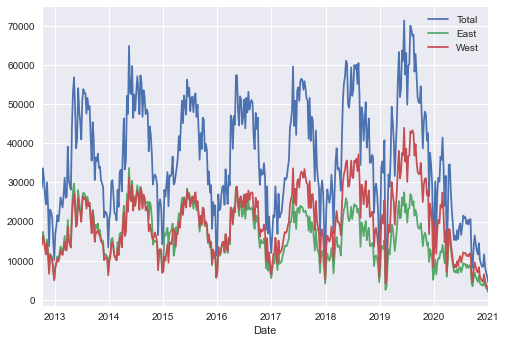

In [7]:
# Initial plot of the data - exploration frequency increase can be attributed to summertime


fremont_df.resample('W').sum().plot()

(0.0, 2520524.1)

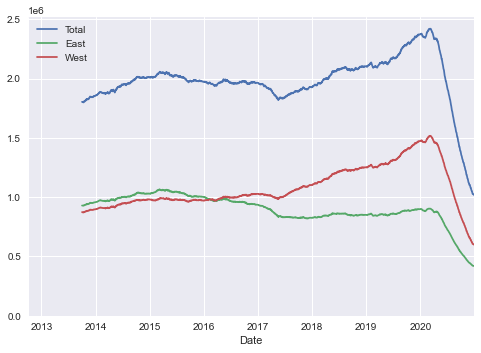

In [8]:
# Plot the annual trend

ax = fremont_df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

<AxesSubplot:xlabel='time'>

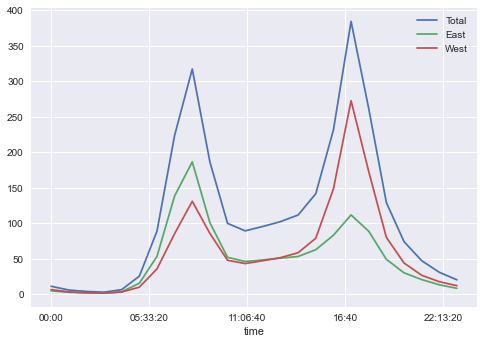

In [9]:
# Explore trends in a daily aspect - a typical commute pattern can be noticed

fremont_df.groupby(fremont_df.index.time).mean().plot()

<AxesSubplot:xlabel='time'>

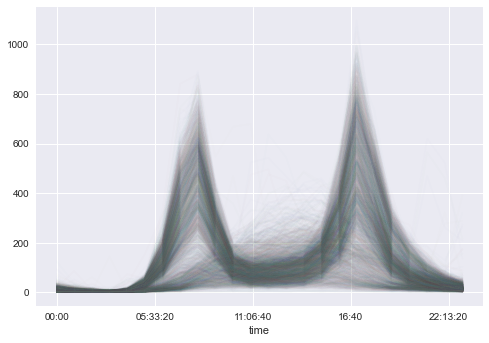

In [10]:
# Pivot the data - hour:date
# There is a noticeable separation in terms of days and two patterns can be observed - weekdays:weekends

pivoted_df = fremont_df.pivot_table('Total', index = fremont_df.index.time, columns = fremont_df.index.date)
pivoted_df.plot(legend = False, alpha = 0.01)